In [1]:
from meta_opt.utils.experiment_utils import make, process_results, bcolors, plot, get_final_cparams

import os
import matplotlib.pyplot as plt
from IPython.display import HTML
import itertools
import dill as pkl

In [2]:
# configuration
CFG = {
    # training options are None because we arent training :)
    'workload': None,
    'num_iters': None,
    'eval_every': None,
    'num_eval_iters': None,
    'batch_size': None,
    'full_batch': True,
    'reset_every': None,

    # experiment options
    'experiment_name': None,
    'load_checkpoint': True,
    'overwrite': False,  # whether to allow us to overwrite existing checkpoints or throw errors
    'directory': os.path.abspath("../"),
}

def append_results(processed_results, experiment_name):
    baseline_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], experiment_name), 'rb'))
    r = {}
    for k in baseline_results.keys(): 
        r[k] = baseline_results[k]
        if k not in processed_results: continue
        for _k, _v in processed_results[k].items():
            r[k][_k] = _v
    return r

# MNIST stochastic

In [30]:
# load
CFG['experiment_name'] = 'mnist'
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# processed_results = process_results(CFG, results)
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

# processed_results = append_results(processed_results, 'mnist_baselines')
# processed_results = append_results(processed_results, 'mnist_pretrained')

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/mnist_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/mnist_raw.pkl, containing ['metaopt_cf', 'metaopt_cf_long', 'metaopt_ncf', 'metaopt_ncf_quick', 'sgd', 'momentum', 'adamw', 'rmsprop', 'hgd', 'metaopt_cf_long_noadam', 'metaopt_ncf_noadam', 'metaopt_ncf_long_noadam']
note: using full_batch means we will never eval


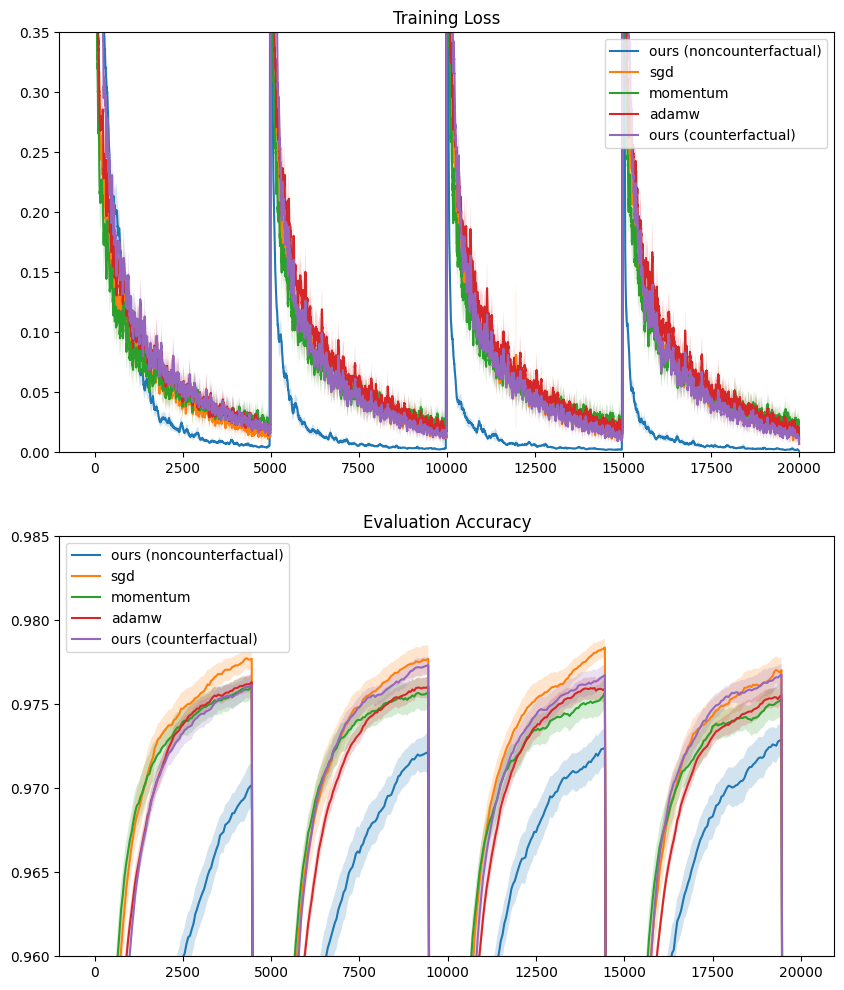

In [33]:
# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    # 'dadamw': 'd-adap',
    # 'mechadamw': 'mechanic',
    # 'rmsprop',
    # 'hgd': 'hgd',
    # 'frozen': 'ours (frozen)',
    'metaopt_cf_long_noadam': 'ours (counterfactual)',
    # 'metaopt_ncf_noadam': 'ours (noncounterfactual)',
    'metaopt_ncf_quick': 'ours (noncounterfactual)',
    
    # # custom ones
    # 'sgd_2.0': 'sgd',
    # 'momentum_0.3': 'momentum',
    # 'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]': 'ours (frozen)',
    # 'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              # 'eval_loss': 'Evaluation Loss',
              'eval_acc': 'Evaluation Accuracy',
              # 'bleu': 'BLEU Score',
              # 'M': 'Learned Coefficients',
              # 'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# keys_to_plot = '.*'  # anything

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-5, 2), smoothing=20)
ax[0].set_ylim(0, 0.35)
ax[1].set_ylim(0.96, 0.98)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

# MNIST fullbatch

In [53]:
# load
CFG['experiment_name'] = 'mnist_fullbatch'
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# processed_results = process_results(CFG, results)
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

# processed_results = append_results(processed_results, 'mnist_baselines_fullbatch')
# processed_results = append_results(processed_results, 'mnist_pretrained')

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/mnist_fullbatch_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/mnist_fullbatch_raw.pkl, containing ['cf', 'cf_3', 'cf_0.1', 'ncf', 'ncf_0.1', 'sgd', 'momentum', 'adamw', 'hgd']
note: using full_batch means we will never eval


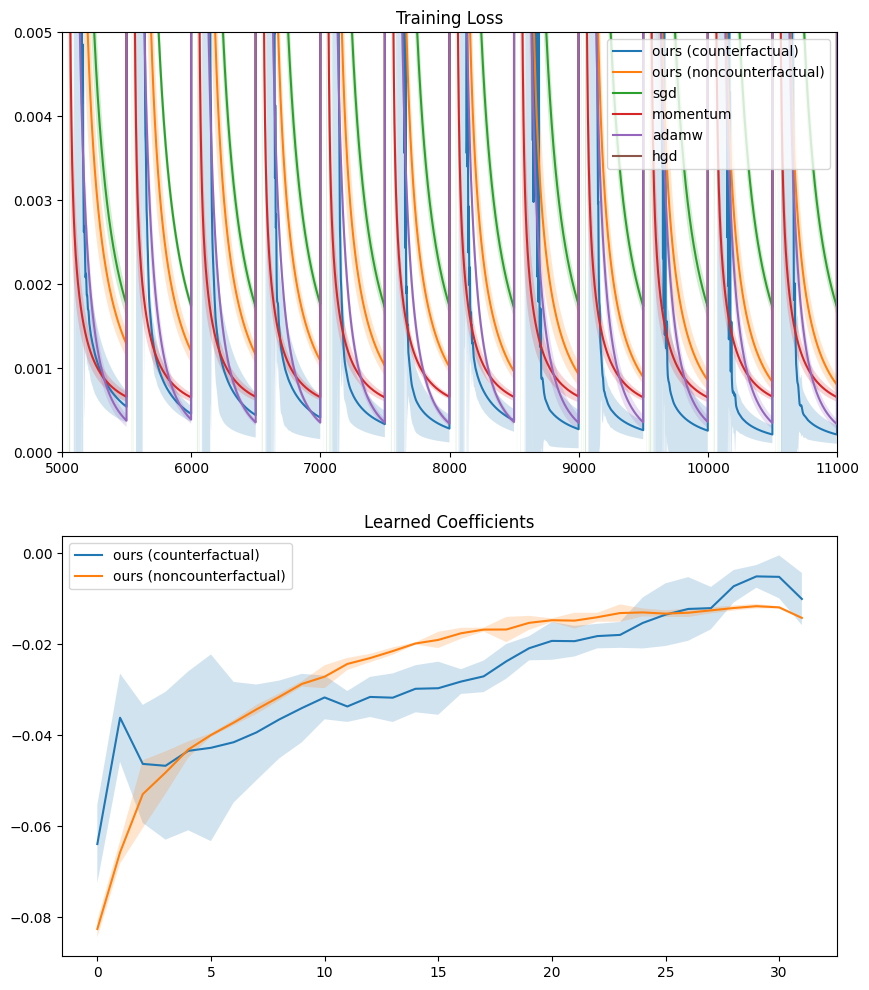

In [55]:
# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    # 'dadamw': 'd-adap',
    # 'mechadamw': 'mechanic',
    # 'rmsprop',
    'hgd': 'hgd',
    # 'frozen': 'ours (frozen)',
    'cf': 'ours (counterfactual)',
    'ncf': 'ours (noncounterfactual)',
    
    # # custom ones
    # 'sgd_2.0': 'sgd',
    # 'momentum_0.3': 'momentum',
    # 'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]': 'ours (frozen)',
    # 'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              # 'eval_loss': 'Evaluation Loss',
              # 'eval_acc': 'Evaluation Accuracy',
              # 'bleu': 'BLEU Score',
              'M': 'Learned Coefficients',
              # 'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# keys_to_plot = '.*'  # anything

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-5, 2), smoothing=None)
ax[0].set_ylim(0, 0.005)
ax[0].set_xlim(5000, 11000)
# ax[1].set_ylim(0.96, 0.985)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

# CIFAR stochastic

In [38]:
# load
CFG['experiment_name'] = 'cifar_pretrained'
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# processed_results = process_results(CFG, results)
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/cifar_pretrained_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/cifar_pretrained_raw.pkl, containing ['cf', 'frozen', 'ncf', 'sgd', 'momentum', 'adamw', 'hgd']
note: using full_batch means we will never eval


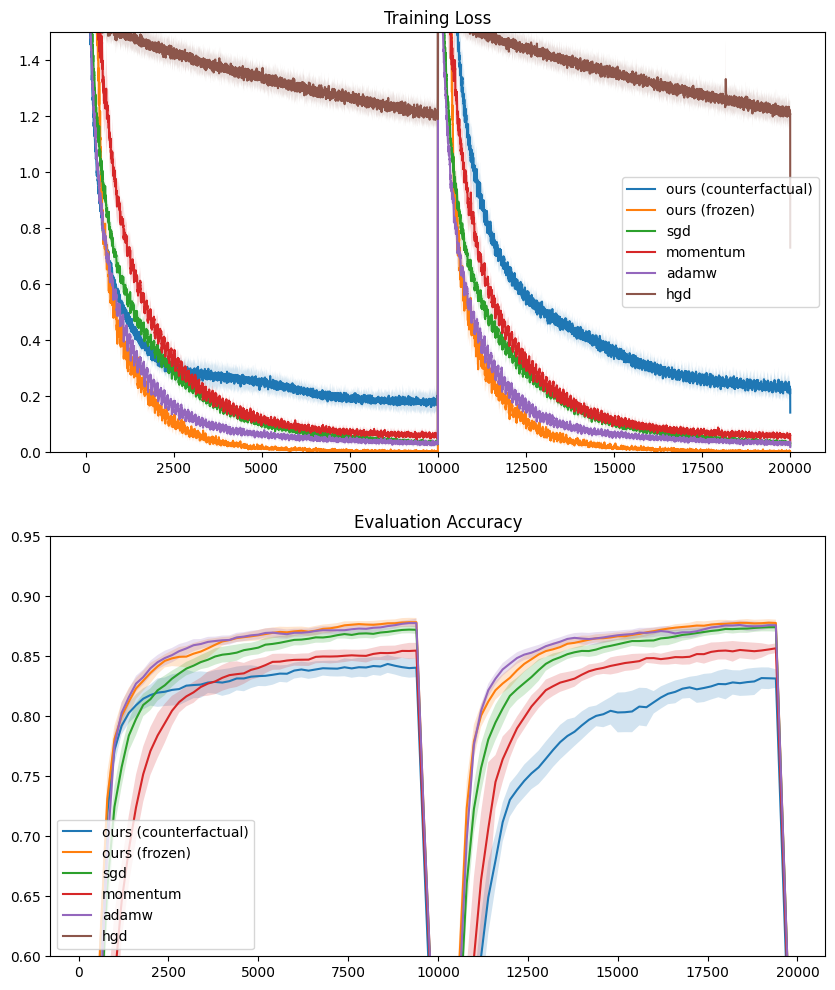

In [45]:
# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    # 'dadamw': 'd-adap',
    # 'mechadamw': 'mechanic',
    # 'rmsprop',
    'hgd': 'hgd',
    'frozen': 'ours (frozen)',
    'cf': 'ours (counterfactual)',
    
    # # custom ones
    # 'sgd_2.0': 'sgd',
    # 'momentum_0.3': 'momentum',
    # 'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]': 'ours (frozen)',
    # 'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              # 'eval_loss': 'Evaluation Loss',
              'eval_acc': 'Evaluation Accuracy',
              # 'bleu': 'BLEU Score',
              # 'M': 'Learned Coefficients',
              # 'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# keys_to_plot = '.*'  # anything

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-5, 2), smoothing=5)
ax[0].set_ylim(0, 1.5)
ax[1].set_ylim(0.6, 0.95)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

# CIFAR fullbatch

In [46]:
# load
CFG['experiment_name'] = 'cifar_fullbatch'
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# processed_results = process_results(CFG, results)
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/cifar_fullbatch_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/cifar_fullbatch_raw.pkl, containing ['cf', 'ncf', 'sgd', 'momentum', 'adamw', 'hgd']
note: using full_batch means we will never eval


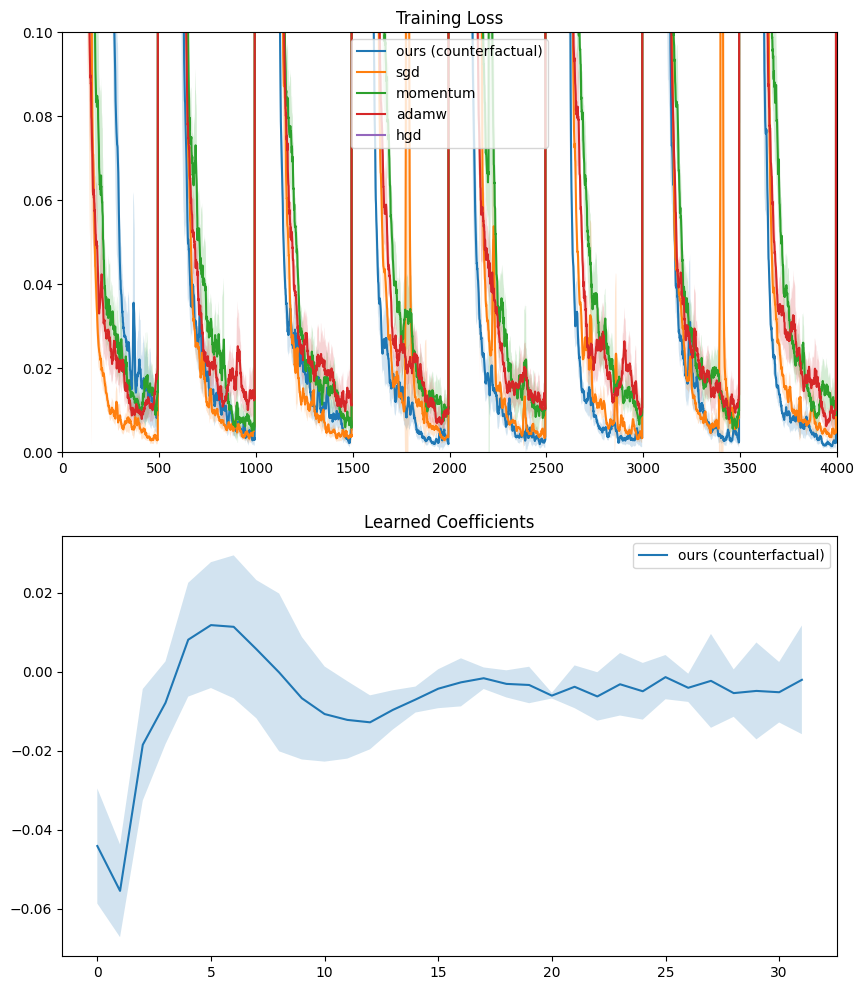

In [52]:
# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    # 'dadamw': 'd-adap',
    # 'mechadamw': 'mechanic',
    # 'rmsprop',
    'hgd': 'hgd',
    'frozen': 'ours (frozen)',
    'cf': 'ours (counterfactual)',
    # 'ncf': 'ours (noncounterfactual)',
    
    # # custom ones
    # 'sgd_2.0': 'sgd',
    # 'momentum_0.3': 'momentum',
    # 'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]': 'ours (frozen)',
    # 'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              # 'eval_loss': 'Evaluation Loss',
              # 'eval_acc': 'Evaluation Accuracy',
              # 'bleu': 'BLEU Score',
              'M': 'Learned Coefficients',
              # 'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# keys_to_plot = '.*'  # anything

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-5, 2), smoothing=10)
ax[0].set_ylim(0, 0.1)
ax[0].set_xlim(0, 4000)
# ax[1].set_ylim(0.6, 0.95)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

# WMT stochastic

In [3]:
# load
CFG['experiment_name'] = 'wmt_pretrained'
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# processed_results = process_results(CFG, results)
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

# processed_results = append_results(processed_results, 'wmt_base_baselines')
# processed_results = append_results(processed_results, 'wmt_pretrained_cf_3')

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/wmt_pretrained_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/wmt_pretrained_raw.pkl, containing ['ncf_adam_frozen', 'ncf_adam', 'ncf', 'ncf_adam_fresh', 'frozen_wmt_fullbatch/cf_adam_1e-3_clip0.5[31000]', 'frozen_wmt_fullbatch_clip/cf_adam_1e-3_clip=1.0[-1]', 'frozen_wmt_fullbatch_clip/cf_adam_1e-3_clip=1.0[33000]', 'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]']
note: using full_batch means we will never eval


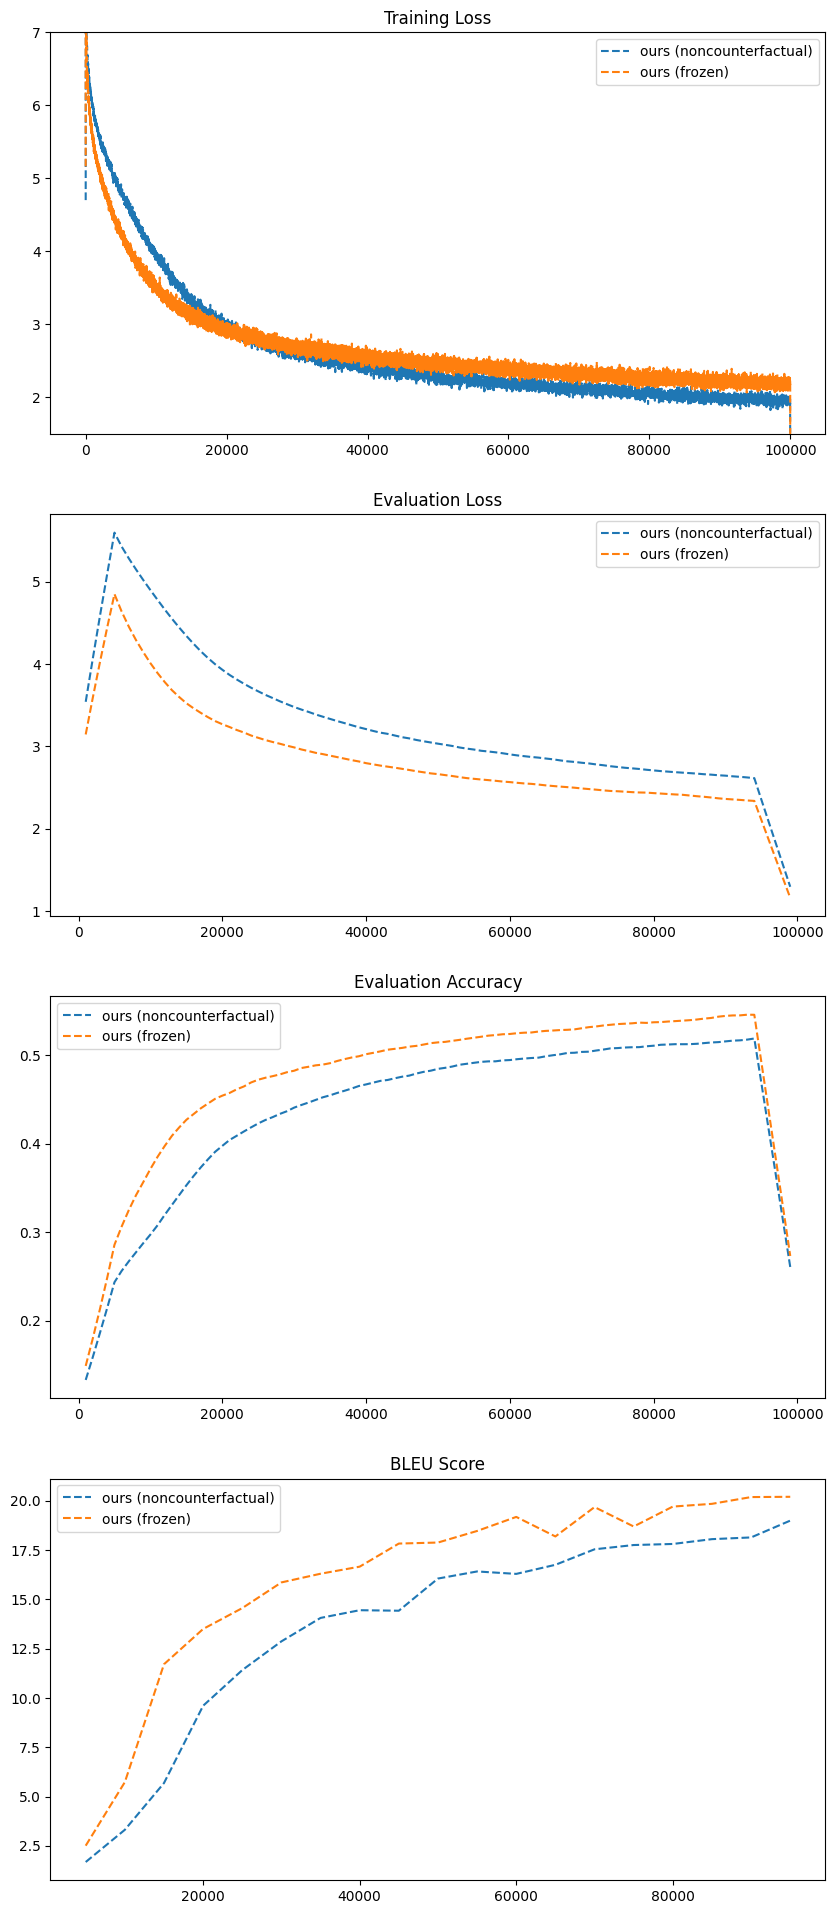

In [5]:
# plot
keys_to_plot = {
    # 'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    # 'dadamw': 'd-adap',
    'mechadamw': 'mechanic',
    # 'rmsprop',
    # 'hgd': 'hgd',
    # 'cf': 'ours (finetuned)',
    'ncf': 'ours (noncounterfactual)',
    
    # custom ones
    'sgd_2.0': 'sgd',
    'momentum_0.3': 'momentum',
    'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]': 'ours (frozen)',
    'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              'eval_loss': 'Evaluation Loss',
              'eval_acc': 'Evaluation Accuracy',
              'bleu': 'BLEU Score',
              # 'M': 'Learned Coefficients',
              # 'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# keys_to_plot = '.*'  # anything

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-5, 2), smoothing=10, dash_baselines=True)
ax[0].set_ylim(1.5, 7)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

# WMT fullbatch

In [9]:
# # load
# CFG['experiment_name'] = 'wmt_fullbatch'
# results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# # processed_results = process_results(CFG, results)
# processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

processed_results = append_results(processed_results, 'wmt_fullbatch_clip')

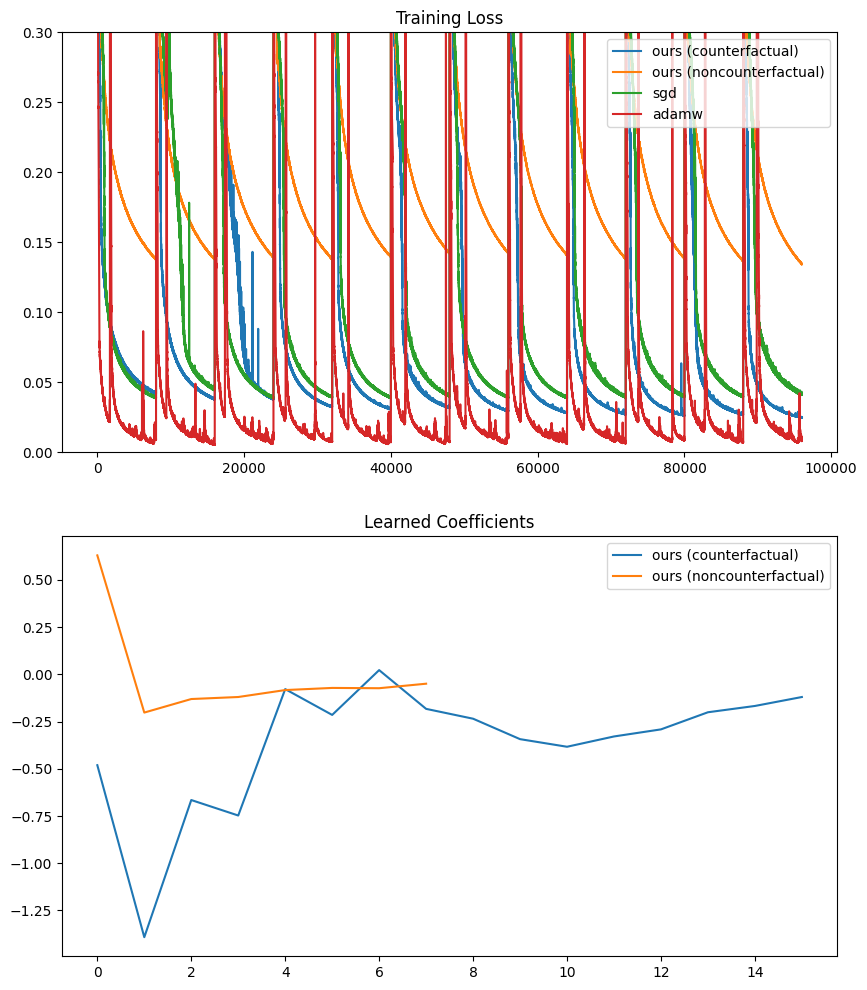

In [17]:
# plot
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    # 'dadamw': 'd-adap',
    # 'mechadamw': 'mechanic',
    # 'rmsprop',
    # 'hgd': 'hgd',
    # 'cf': 'ours (finetuned)',
    # 'ncf': 'ours (noncounterfactual)',
    
    # custom ones
    'sgd_2.0': 'sgd',
    'momentum_0.3': 'momentum',
    'cf_adam_6e-4_clip=1.0': 'ours (counterfactual)',
    'ncf_adam': 'ours (noncounterfactual)',
    # 'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              # 'eval_loss': 'Evaluation Loss',
              # 'eval_acc': 'Evaluation Accuracy',
              # 'bleu': 'BLEU Score',
              'M': 'Learned Coefficients',
              # 'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# keys_to_plot = '.*'  # anything

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-5, 2), smoothing=None)
ax[0].set_ylim(0, 0.3)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

# spare code

## Load

In [73]:
# load
CFG['experiment_name'] = 'wmt_pretrained_cf'
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
# processed_results = process_results(CFG, results)
processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

# processed_results = append_results(processed_results, 'wmt_base_baselines')
# processed_results = append_results(processed_results, 'wmt_fullbatch')
# processed_results = append_results(processed_results, 'wmt_pretrained_cf_3')

## Plot
Plot and also animate the values taken by the $\{M_h\}_{h=1}^H$ coefficients during training. Each $M_h$ multiplies a disturbance from $h$ training steps ago (i.e. 0 is most recent in this plot).

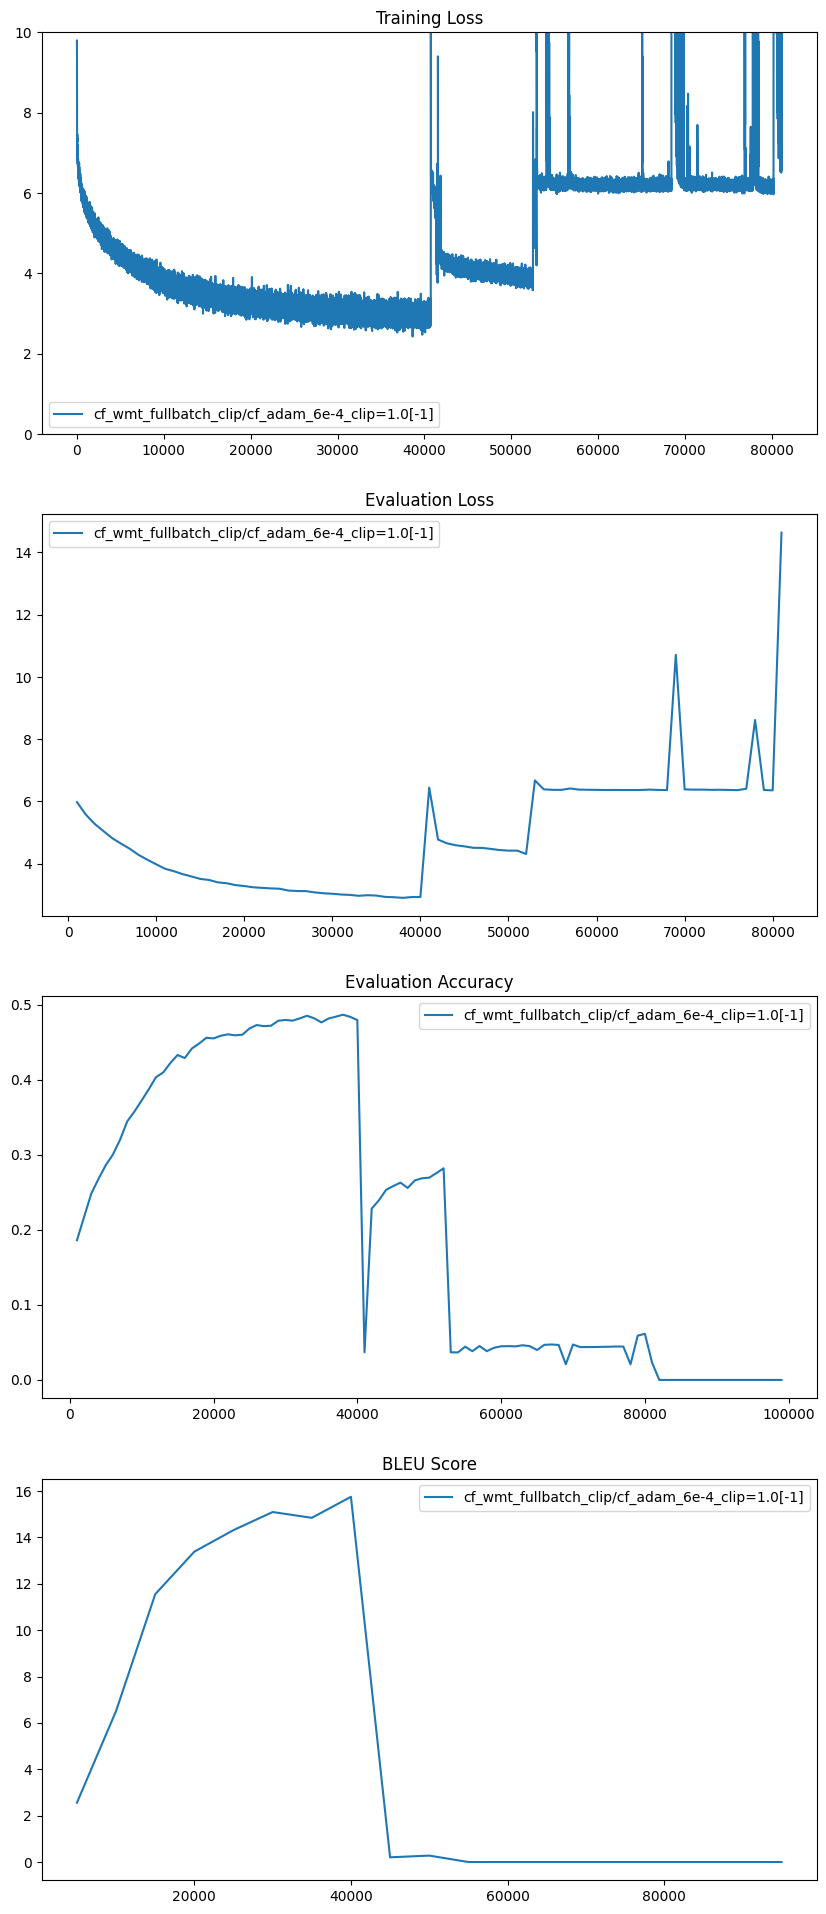

In [77]:
# ----------------------------------------
# plot a particular set of experiments
# ----------------------------------------
keys_to_plot = {
    # 'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    'dadamw': 'd-adap',
    'mechadamw': 'mechanic',
    # 'rmsprop',
    'hgd': 'hgd',
    'frozen': 'ours (frozen)',
    'cf': 'ours (finetuned)',
    'ncf': 'ours (noncounterfactual)',
    
    # custom ones
    'sgd_2.0': 'sgd',
    'momentum_0.3': 'momentum',
    'frozen_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]': 'ours (frozen)',
    'rsqrt_0.002': 'rsqrt',
    
}

plots_to_make = {
              'loss': 'Training Loss',
              'eval_loss': 'Evaluation Loss',
              'eval_acc': 'Evaluation Accuracy',
              'bleu': 'BLEU Score',
              # 'M': 'Learned Coefficients',
              # 'anim': 'Animation',
              # 'param_sq_norm': 'Sq Param Norm',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               # 'lr': 'Learning Rate',
}

# ----------------------------------------
# OR just plot em via regex
# ----------------------------------------
# keys_to_plot = '.*mech.*'  # specific regex
keys_to_plot = '.*'  # anything

# from copy import deepcopy
# import numpy as np
# q = deepcopy(processed_results)
# T = 58000
# q['loss']['sgd']['t'] = np.array(q['loss']['sgd']['t']) + T
# (fig, ax), anim = plot(results, q, keys_to_plot, plots_to_make, anim_bounds=(-1.5, 0.5), smoothing=None)
# del q

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-5, 2), smoothing=None)
ax[0].set_ylim(0, 10)
# ax[0].set_xlim(T, T + 2000)
# ax[1].set_ylim(0.6, 0.95)
# ax[2].set_ylim(0.95, 0.99)
# ax[3].set_ylim(0.95, 0.99)
# ax[4].set_ylim(0, 1)
# ax[1].set_ylim(0, 0.01)

# import matplotlib
# matplotlib.rcParams.update({'font.size': 12})



# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)

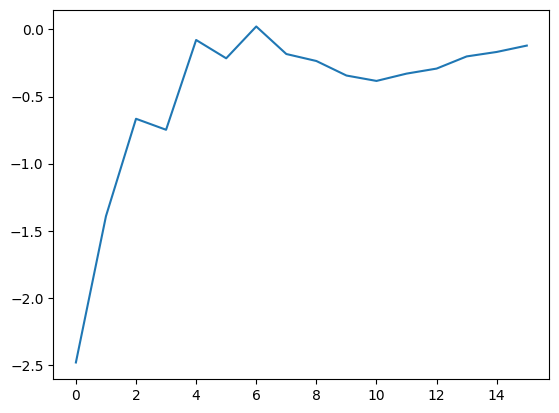

In [76]:
import matplotlib.pyplot as plt
M = processed_results['M']['cf_wmt_fullbatch_clip/cf_adam_6e-4_clip=1.0[-1]']['avg'][0]
M = M[::-1]
M[0] -= 1.0
plt.plot(range(16), M)